In [1]:
library('clusterProfiler')
library("org.Mm.eg.db")
library(ggplot2)



clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, 

In [2]:
eRegulon_direct <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/scATAC_and_scRNA/scenicplus/scplus_pipeline/Snakemake/eRegulon_direct.tsv',header=T)
eRegulon_direct

Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>
chr16:3699221-3699721,Zfp263,0.17710567,0.06742752,0.011941796,0.011941796,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),0.6445916,1,0.08483178,534
chr5:91274359-91274859,Ereg,0.05771994,0.22086535,0.012748334,0.012748334,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),1.8890055,1,0.22394028,370
chr2:83759977-83760477,Itgav,0.10896906,0.21439983,0.023362949,0.023362949,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),1.4171001,1,0.18118543,985
chr19:42214593-42215093,Marveld1,0.03728972,0.11565401,0.004312706,0.004312706,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),0.6656859,1,0.08358260,4686
chr1:183921242-183921742,Dusp10,0.05876159,0.06966251,0.004093480,0.004093480,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),0.8548303,1,0.15032882,3862
chr17:67240962-67241462,Ptprm,0.06218305,0.18545827,0.011532362,0.011532362,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),0.6758642,1,0.12205482,2871
chr17:26631695-26632195,Dusp1,0.07013995,0.23045396,0.016164030,0.016164030,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),2.5860738,1,0.40436089,41
chr10:13976259-13976759,Hivep2,0.09690014,0.19718782,0.019107527,0.019107527,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),1.7045205,1,0.16360335,253
chr4:33261337-33261837,Pnrc1,0.09249069,0.14574704,0.013480245,0.013480245,Fosb,False,Fosb_direct_+/+,Fosb_direct_+/+_(77g),Fosb_direct_+/+_(97r),2.1286143,1,0.20167263,541


In [28]:
cluster3_go <- enrichGO(gene = eRegulon_direct[eRegulon_direct$TF %in% c('Fos','Jun','Fosb','Junb'),'Gene'],
               keyType = 'SYMBOL', 
               OrgDb = 'org.Mm.eg.db', 
                 pAdjustMethod = 'fdr', 
                 pvalueCutoff = 0.05,  
                 qvalueCutoff = 0.25, 
                 readable = FALSE,
           ont="BP") #MF

In [9]:
write.table(cluster3_go@result,file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3/multiome/cluster3_go.csv',col.names = NA,sep=',',quote=F)

In [23]:
cluster3_go_df <- cluster3_go@result[cluster3_go@result$ID %in% c('GO:0030198','GO:0060485','GO:0071559','GO:0010631','GO:0048762','GO:0010717'),]
cluster3_go_df <- cluster3_go_df[,c('Description','GeneRatio','p.adjust')]
cluster3_go_df$cluster <- '3'
cluster3_go_df

,Description,GeneRatio,p.adjust,cluster
,<chr>,<chr>,<dbl>,<chr>
GO:0030198,extracellular matrix organization,30/414,6.392905e-13,3
GO:0071559,response to transforming growth factor beta,26/414,2.707800e-12,3
GO:0010631,epithelial cell migration,28/414,1.950291e-11,3
GO:0060485,mesenchyme development,21/414,3.786085e-07,3
GO:0048762,mesenchymal cell differentiation,18/414,1.363829e-06,3
GO:0010717,regulation of epithelial to mesenchymal transition,9/414,1.770898e-04,3


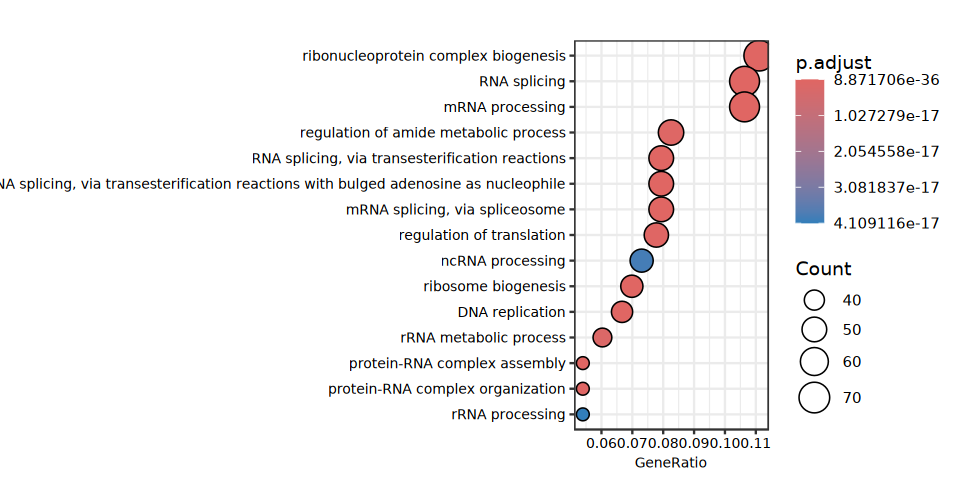

In [6]:
cluster2_go <- enrichGO(gene = eRegulon_direct[eRegulon_direct$TF %in% c('Hmga1','Tfdp1','Srebf2'),'Gene'],
               keyType = 'SYMBOL', 
               OrgDb = 'org.Mm.eg.db', 
                 pAdjustMethod = 'fdr', 
                 pvalueCutoff = 0.05,  
                 qvalueCutoff = 0.25, 
                 readable = FALSE,
           ont="BP") #MF

options(repr.plot.width = 8, repr.plot.height = 4)
dotplot(cluster2_go,label_format = 100 ,showCategory=15, font.size=8)

In [15]:
write.table(cluster2_go@result,file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3/multiome/cluster2_go.csv',col.names = NA,sep=',',quote=F)

In [18]:
cluster2_go_df <- cluster2_go@result[cluster2_go@result$ID %in% c('GO:0022613','GO:0008380','GO:0006260','GO:0042254','GO:0006261'),]
cluster2_go_df <- cluster2_go_df[,c('Description','GeneRatio','p.adjust')]
cluster2_go_df$cluster <- '2'
cluster2_go_df

,Description,GeneRatio,p.adjust,cluster
,<chr>,<chr>,<dbl>,<chr>
GO:0022613,ribonucleoprotein complex biogenesis,70/630,8.871706e-36,2
GO:0008380,RNA splicing,67/630,1.267426e-32,2
GO:0006260,DNA replication,42/630,1.985072e-20,2
GO:0042254,ribosome biogenesis,44/630,1.165516e-19,2
GO:0006261,DNA-templated DNA replication,29/630,9.115404e-17,2


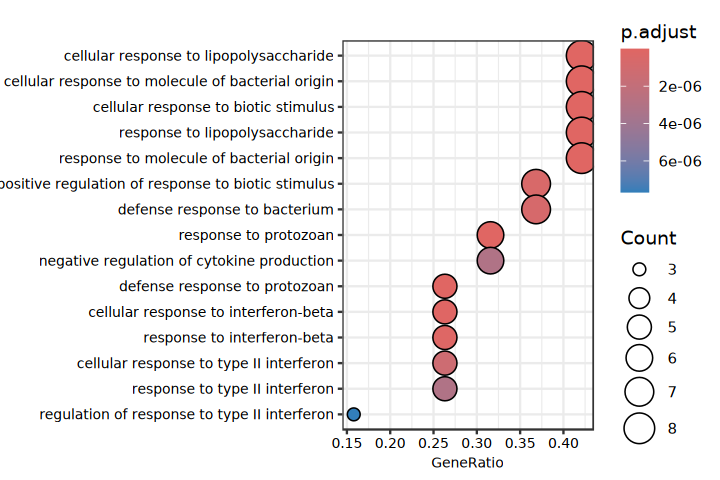

In [8]:
cluster5_go <- enrichGO(gene = eRegulon_direct[eRegulon_direct$TF %in% c('Irf1'),'Gene'],
               keyType = 'SYMBOL', 
               OrgDb = 'org.Mm.eg.db', 
                 pAdjustMethod = 'fdr', 
                 pvalueCutoff = 0.05,  
                 qvalueCutoff = 0.25, 
                 readable = FALSE,
           ont="BP") #MF

options(repr.plot.width = 6, repr.plot.height = 4)
dotplot(cluster5_go,label_format = 100 ,showCategory=15, font.size=8)

In [20]:
write.table(cluster5_go@result,file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3/multiome/cluster5_go.csv',col.names = NA,sep=',',quote=F)

In [9]:
cluster5_go_df <- cluster5_go@result[cluster5_go@result$ID %in% c('GO:0035458','GO:0071216','GO:0001818'),]
cluster5_go_df <- cluster5_go_df[,c('Description','GeneRatio','p.adjust')]
cluster5_go_df$cluster <- '5'
cluster5_go_df

,Description,GeneRatio,p.adjust,cluster
,<chr>,<chr>,<dbl>,<chr>
GO:0071216,cellular response to biotic stimulus,8/19,7.931432e-09,5
GO:0035458,cellular response to interferon-beta,5/19,6.701552e-08,5
GO:0001818,negative regulation of cytokine production,6/19,3.111646e-06,5


In [24]:
cluster_go <- rbind(cluster2_go_df,cluster3_go_df,cluster5_go_df)
cluster_go 

,Description,GeneRatio,p.adjust,cluster
,<chr>,<chr>,<dbl>,<chr>
GO:0022613,ribonucleoprotein complex biogenesis,70/630,8.871706e-36,2
GO:0008380,RNA splicing,67/630,1.267426e-32,2
GO:0006260,DNA replication,42/630,1.985072e-20,2
GO:0042254,ribosome biogenesis,44/630,1.165516e-19,2
GO:0006261,DNA-templated DNA replication,29/630,9.115404e-17,2
GO:0030198,extracellular matrix organization,30/414,6.392905e-13,3
GO:0071559,response to transforming growth factor beta,26/414,2.707800e-12,3
GO:0010631,epithelial cell migration,28/414,1.950291e-11,3
GO:0060485,mesenchyme development,21/414,3.786085e-07,3


In [25]:
cluster_go$Description <- factor(cluster_go$Description,levels = rev(cluster_go$Description))

png 
  2

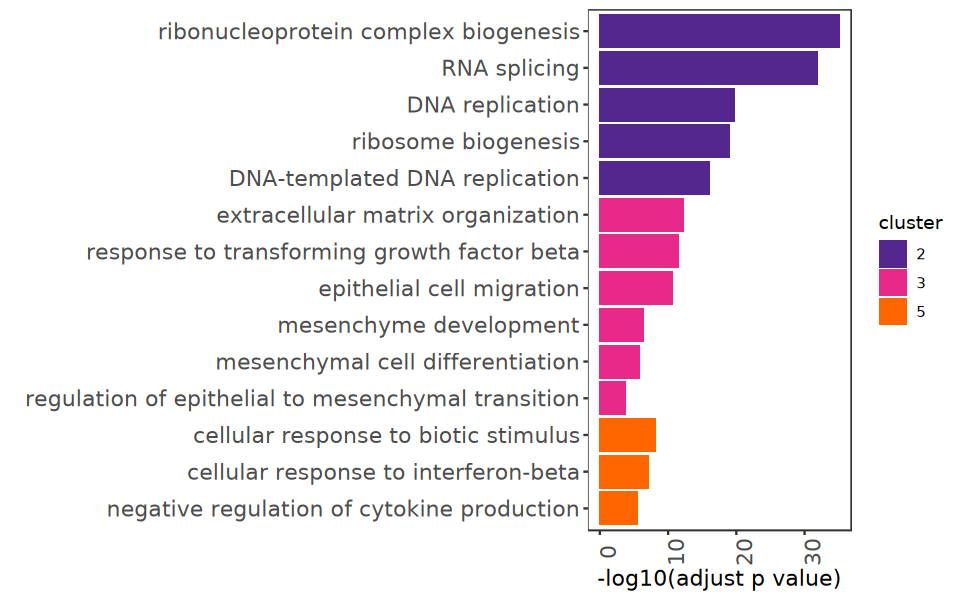

In [27]:
options(repr.plot.width = 8, repr.plot.height = 5)
pdf('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3/multiome/GO_atac.pdf',width=8,height=5)
plot <- ggplot(cluster_go,aes(x=Description,y=-log10(p.adjust))) +geom_bar(aes(fill=cluster),stat = "identity") + xlab('')+ylab('-log10(adjust p value)')+
    scale_fill_manual(breaks=c(1,2,3,4,5),
        values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')) + theme_bw()+coord_flip() +
    theme(panel.grid=element_blank(),axis.title=element_text(size=13),axis.text = element_text(size = 13),axis.text.x = element_text(angle = 90))
print(plot)
dev.off()
print(plot)